In [85]:
print("Merhaba, İGÜ - İSTKA/ dosyalama_islemleri")
import sys
print(sys.version)
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/VERIYAPILARI')
!pwd

Merhaba, İGÜ - İSTKA/ dosyalama_islemleri
3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/VERIYAPILARI


In [87]:
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI/veriseti'

for file in os.listdir(VeriSetiYolu):                         # Klasördeki tüm dosyaları listele

    if file.endswith(('.xlsx', '.xls')):                     # Sadece Excel dosyalarını seç

        df = pd.read_excel(os.path.join(VeriSetiYolu, file))  # Excel dosyasını pandas ile oku

        df.to_csv(os.path.join(VeriSetiYolu, file.rsplit('.', 1)[0] + '.csv'), index=False)
                                                               # DataFrame'i CSV formatında kaydet
        print(f"{file} dosyası CSV formatına çevrildi.")     # Çevrim İşlemi Çıktısı


atktan-geri-kazanm-miktarlar .xlsx dosyası CSV formatına çevrildi.


In [90]:
import os
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI/veriseti'

# VeriSetiYolu içindeki .csv dosyalarını bul ve say
csv_dosyalari = [dosya for dosya in os.listdir(VeriSetiYolu) if dosya.endswith('.csv')]

# .csv dosya sayısını ekrana yazdır
csv_dosya_sayisi = len(csv_dosyalari)
print(f"VeriSetiYolu içerisinde {csv_dosya_sayisi} tane .csv dosyası bulunuyor.")

# Mevcut *.csv uzantılı dosyaların isimlerini getiriyoruz.
print("Bulunan CSV Dosyaları:")
for dosya in csv_dosyalari:
    print(dosya)

VeriSetiYolu içerisinde 2 tane .csv dosyası bulunuyor.
Bulunan CSV Dosyaları:
atik.csv
atktan-geri-kazanm-miktarlar .csv


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
dosya_yolu = '/content/drive/My Drive/VERIYAPILARI/veriseti/atktan-geri-kazanm-miktarlar.csv'
csv_dosya = pd.read_csv(dosya_yolu)

print(csv_dosya)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/VERIYAPILARI/veriseti/atktan-geri-kazanm-miktarlar.csv'

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
dosya_yolu = '/content/drive/My Drive/VERIYAPILARI/veriseti/atik.csv'
csv_dosya = pd.read_csv(dosya_yolu)

print(csv_dosya)

    ID   Yil  UKM_[ton]  ITGDMM_[ton]  ATYM_[ton]  CGUEEM_[MWh]
0    1  2004      16861          1513         NaN          5938
1    2  2009      10450          8454      1087.0         70895
2    3  2014      17136         17425     35552.0        336547
3    4  2015      18423          7069     63894.0        282225
4    5  2016      18336         18815     39602.0        404330
5    6  2017      18474         10974     13291.0        389299
6    7  2018      14673          9163     21757.0        376765
7    8  2019      16503          8832     26417.0        477608
8    9  2020      19510          4627     11726.0        455892
9   10  2021      11545          4793     11047.0        843748
10  11  2022      14971          3856     30952.0       1306116
11  12  2023       6620          3073     29870.0       1316731


In [94]:
# Verileri hazırlama
id = csv_dosya.iloc[:, 0]
print(id)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: ID, dtype: int64


In [95]:
yil_bilgisi = csv_dosya.iloc[:, 1]
kompost_miktari = csv_dosya.iloc[:, 2]
geri_donusturulen_malzeme_miktari = csv_dosya.iloc[:, 3]
atik_yakiti_miktari = csv_dosya.iloc[:, 4]
elektrik_enerjisi_miktari = csv_dosya.iloc[:, 5]

print(id)
print(yil_bilgisi)
print(kompost_miktari)
print(geri_donusturulen_malzeme_miktari)
print(atik_yakiti_miktari)
print(elektrik_enerjisi_miktari)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: ID, dtype: int64
0     2004
1     2009
2     2014
3     2015
4     2016
5     2017
6     2018
7     2019
8     2020
9     2021
10    2022
11    2023
Name: Yil, dtype: int64
0     16861
1     10450
2     17136
3     18423
4     18336
5     18474
6     14673
7     16503
8     19510
9     11545
10    14971
11     6620
Name: UKM_[ton], dtype: int64
0      1513
1      8454
2     17425
3      7069
4     18815
5     10974
6      9163
7      8832
8      4627
9      4793
10     3856
11     3073
Name: ITGDMM_[ton], dtype: int64
0         NaN
1      1087.0
2     35552.0
3     63894.0
4     39602.0
5     13291.0
6     21757.0
7     26417.0
8     11726.0
9     11047.0
10    30952.0
11    29870.0
Name: ATYM_[ton], dtype: float64
0        5938
1       70895
2      336547
3      282225
4      404330
5      389299
6      376765
7      477608
8      455892
9      843748
10    1306116
11    1

Veri Görselleme - İlk sütunu x ekseni olarak kullanarak dört ayrı verinin grafiğini çizelim

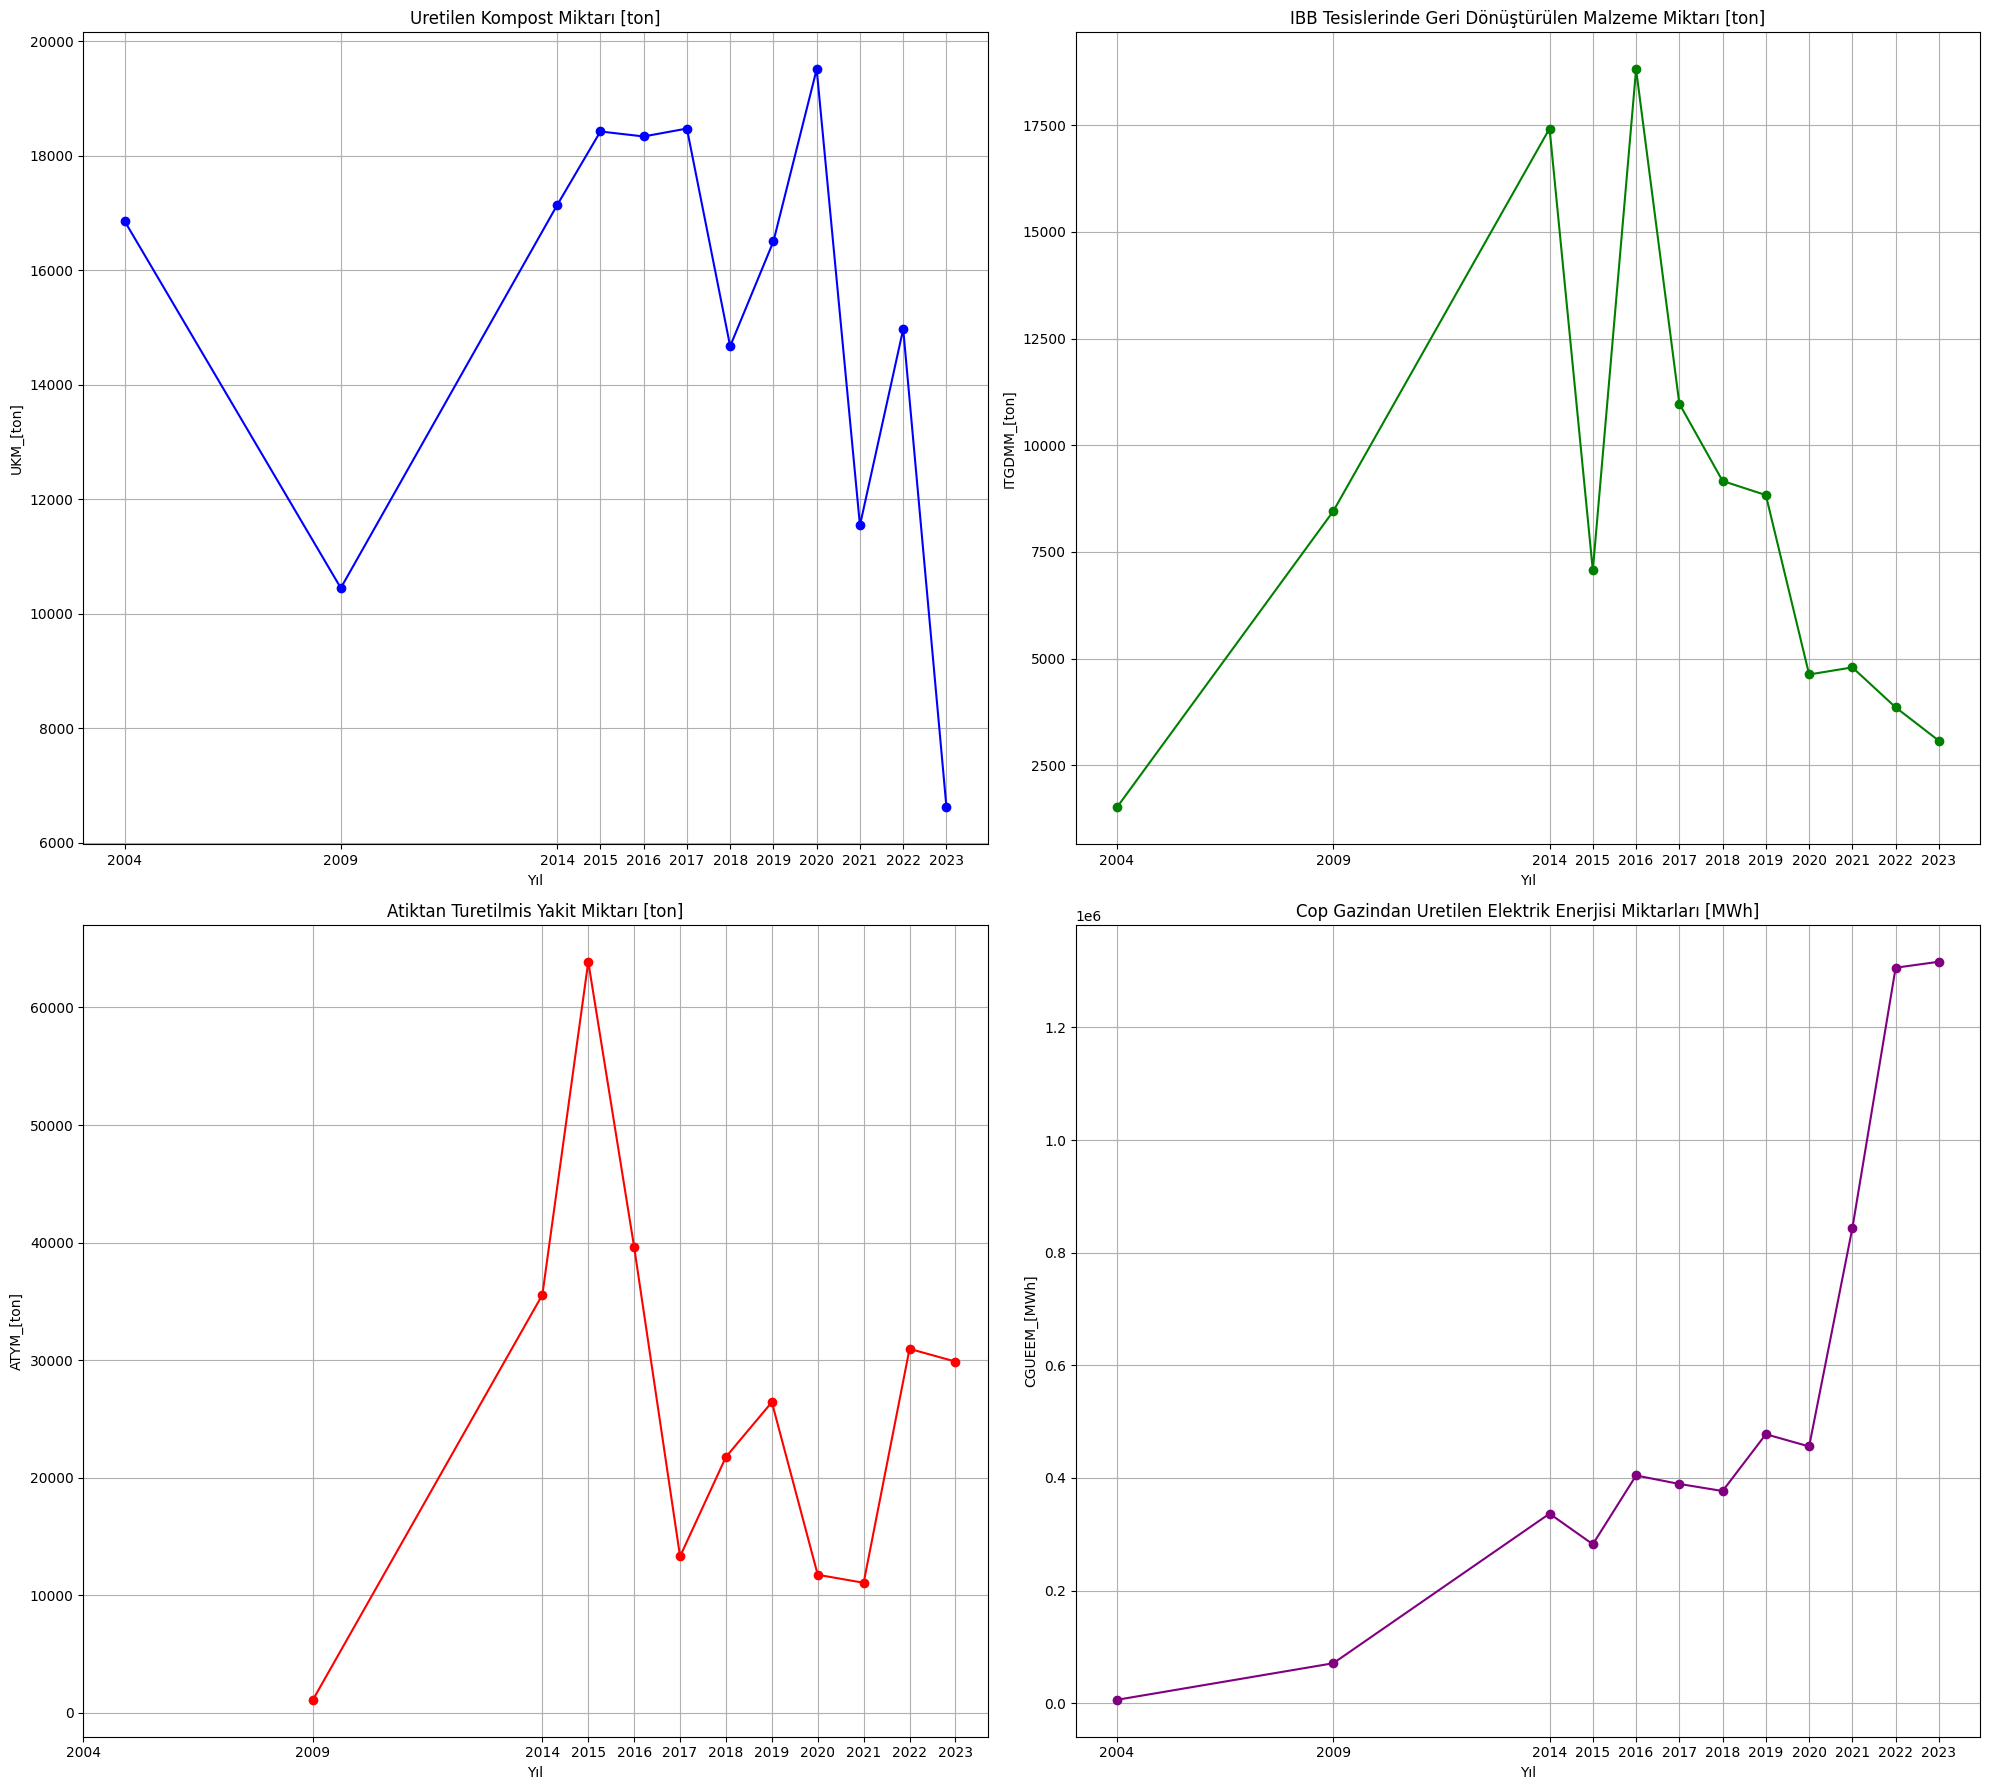

In [96]:
plt.figure(figsize=(20, 18))  # Boyutlar inch cinsinden çizimleri olur.
# Genişlik 20 inch, Yükseklik: 18 inch
# Genişlik: 20 inch = 20 * 2.54 cm ≈ 50.8 cm
# Yükseklik: 18 inch = 18 * 2.54 cm ≈ 45.72 cm

# Kompost Miktarı Grafiği
# Kompost, organik maddelerin daha basit organik ve inorganik maddelere ayrıştırılması işlemidir.
plt.subplot(2, 2, 1)
plt.plot(yil_bilgisi, kompost_miktari, marker='o', color='blue')
plt.title('Uretilen Kompost Miktarı [ton]')
plt.xlabel('Yıl')
plt.ylabel(csv_dosya.columns[2])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Geri Dönüştürülen Malzeme Miktarı Grafiği
plt.subplot(2, 2, 2)
plt.plot(yil_bilgisi, geri_donusturulen_malzeme_miktari, marker='o', color='green')
plt.title('IBB Tesislerinde Geri Dönüştürülen Malzeme Miktarı [ton]')
plt.xlabel('Yıl')
plt.ylabel(csv_dosya.columns[3])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Atıktan Türetilmiş Yakıt Miktarı Grafiği
plt.subplot(2, 2, 3)
plt.plot(yil_bilgisi, atik_yakiti_miktari, marker='o', color='red')
plt.title('Atiktan Turetilmis Yakit Miktarı [ton]')
plt.xlabel('Yıl')
plt.ylabel(csv_dosya.columns[4])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Çöp Gazından Üretilen Elektrik Enerjisi Miktarları Grafiği
plt.subplot(2, 2, 4)
plt.plot(yil_bilgisi, elektrik_enerjisi_miktari, marker='o', color='purple')
plt.title('Cop Gazindan Uretilen Elektrik Enerjisi Miktarları [MWh]')
plt.xlabel('Yıl')
plt.ylabel(csv_dosya.columns[5])
plt.xticks(yil_bilgisi)  # X eksenine sadece belirli yılları ekle
plt.grid(True)

# Grafikleri yerleştir ve göster
plt.tight_layout()
plt.show()



Veri Görselleme - Tüm Verilerin Birleştirilmesi İçin Çizim Sürecini Gerçekleştiriyoruz.

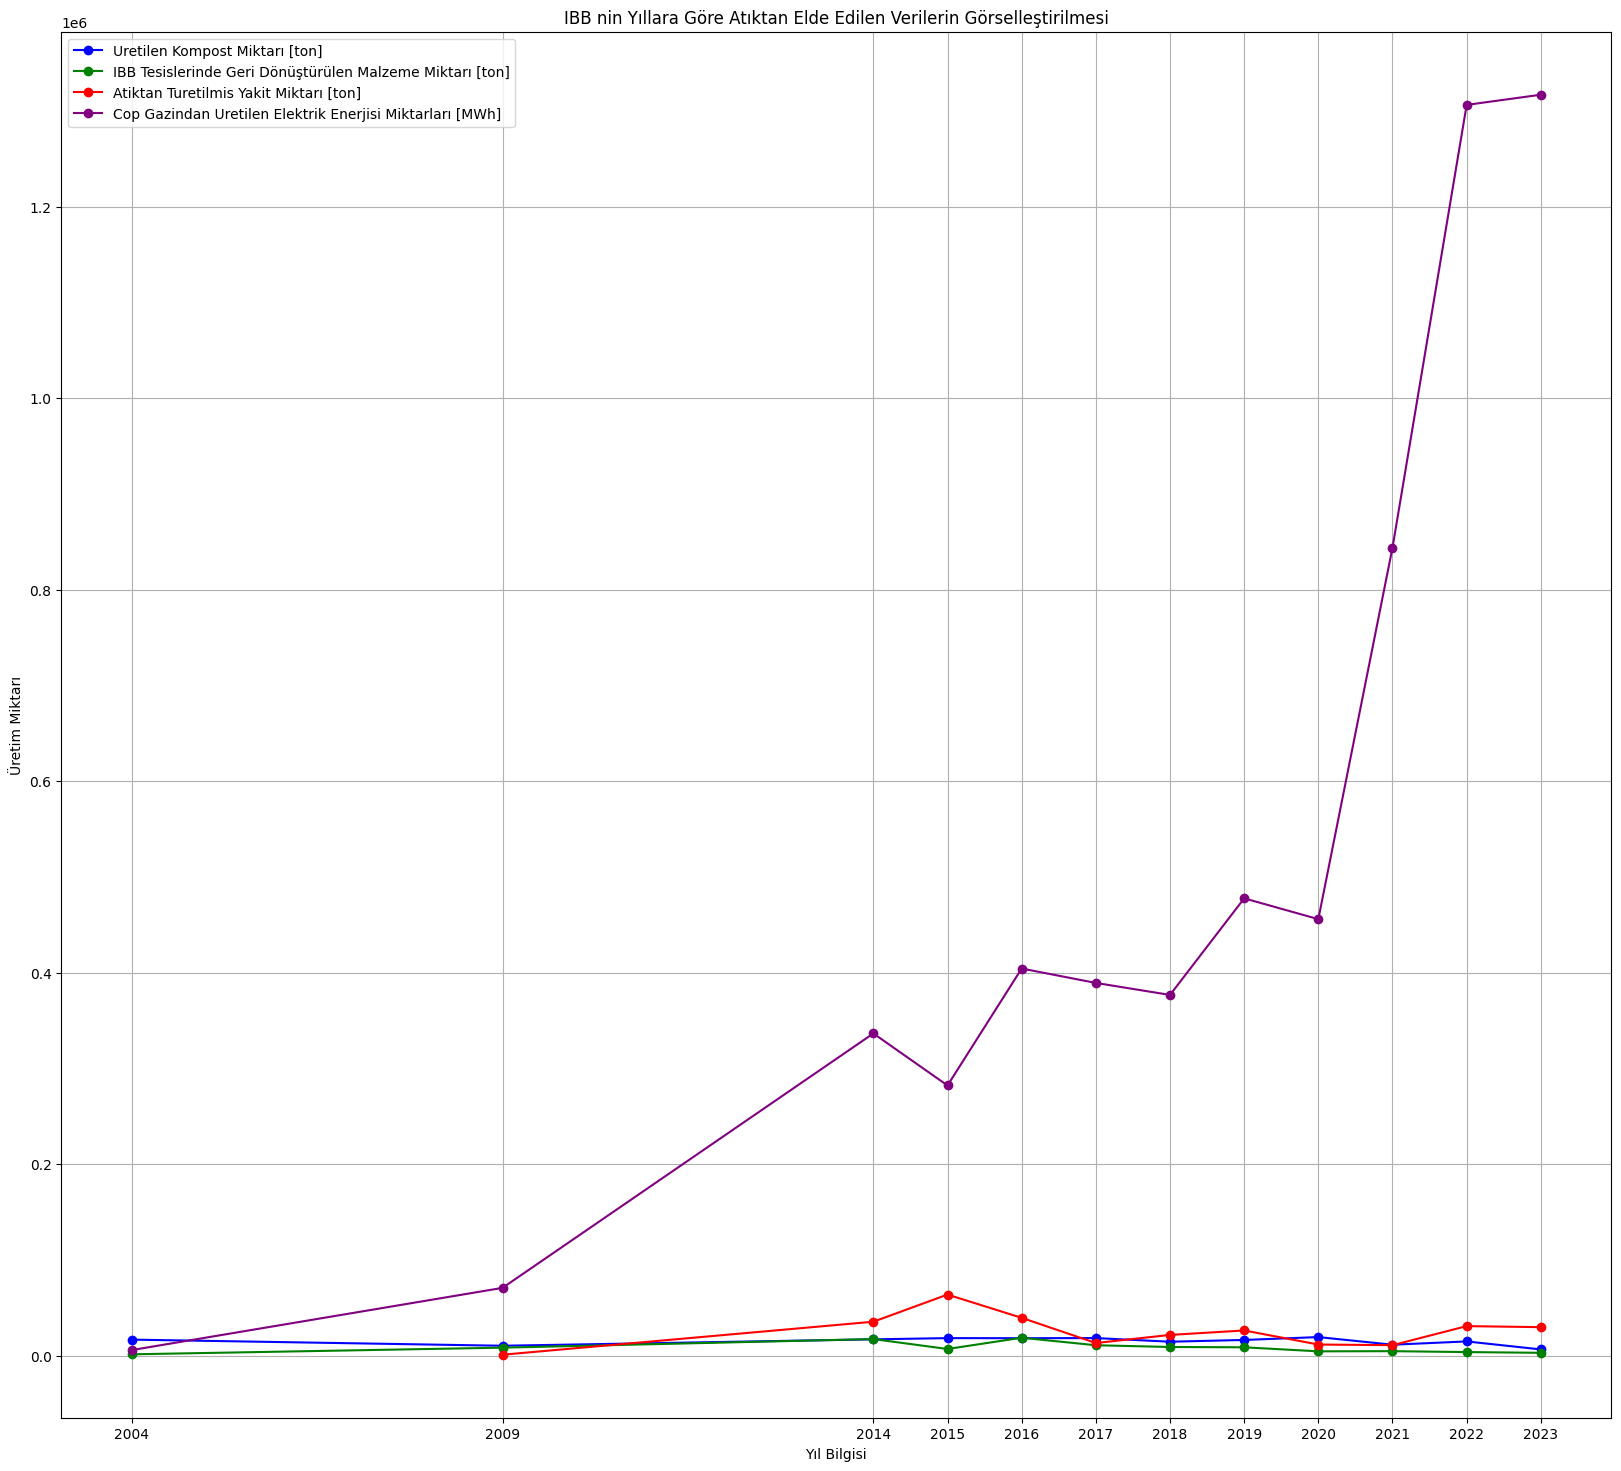

In [97]:
plt.figure(figsize=(20, 18))

plt.plot(yil_bilgisi, kompost_miktari, marker='o', label=csv_dosya.columns[2], color='blue')
plt.plot(yil_bilgisi, geri_donusturulen_malzeme_miktari, marker='o', label=csv_dosya.columns[3], color='green')
plt.plot(yil_bilgisi, atik_yakiti_miktari, marker='o', label=csv_dosya.columns[4], color='red')
plt.plot(yil_bilgisi, elektrik_enerjisi_miktari, marker='o', label=csv_dosya.columns[5], color='purple')

# Grafiği özelleştir
plt.title('IBB nin Yıllara Göre Atıktan Elde Edilen Verilerin Görselleştirilmesi')
plt.xlabel('Yıl Bilgisi')
plt.ylabel('Üretim Miktarı')
plt.xticks(yil_bilgisi)
#plt.legend()
plt.legend(["Uretilen Kompost Miktarı [ton]", "IBB Tesislerinde Geri Dönüştürülen Malzeme Miktarı [ton]", "Atiktan Turetilmis Yakit Miktarı [ton]", "Cop Gazindan Uretilen Elektrik Enerjisi Miktarları [MWh]"])
plt.grid(True)

# Grafiği göster
plt.show()

Veri Görselleme - Tüm Verilerin Bar Kod İle Veri Seti Görselleştirilmesi - Bar plotları çizmek için kod hazırlığı

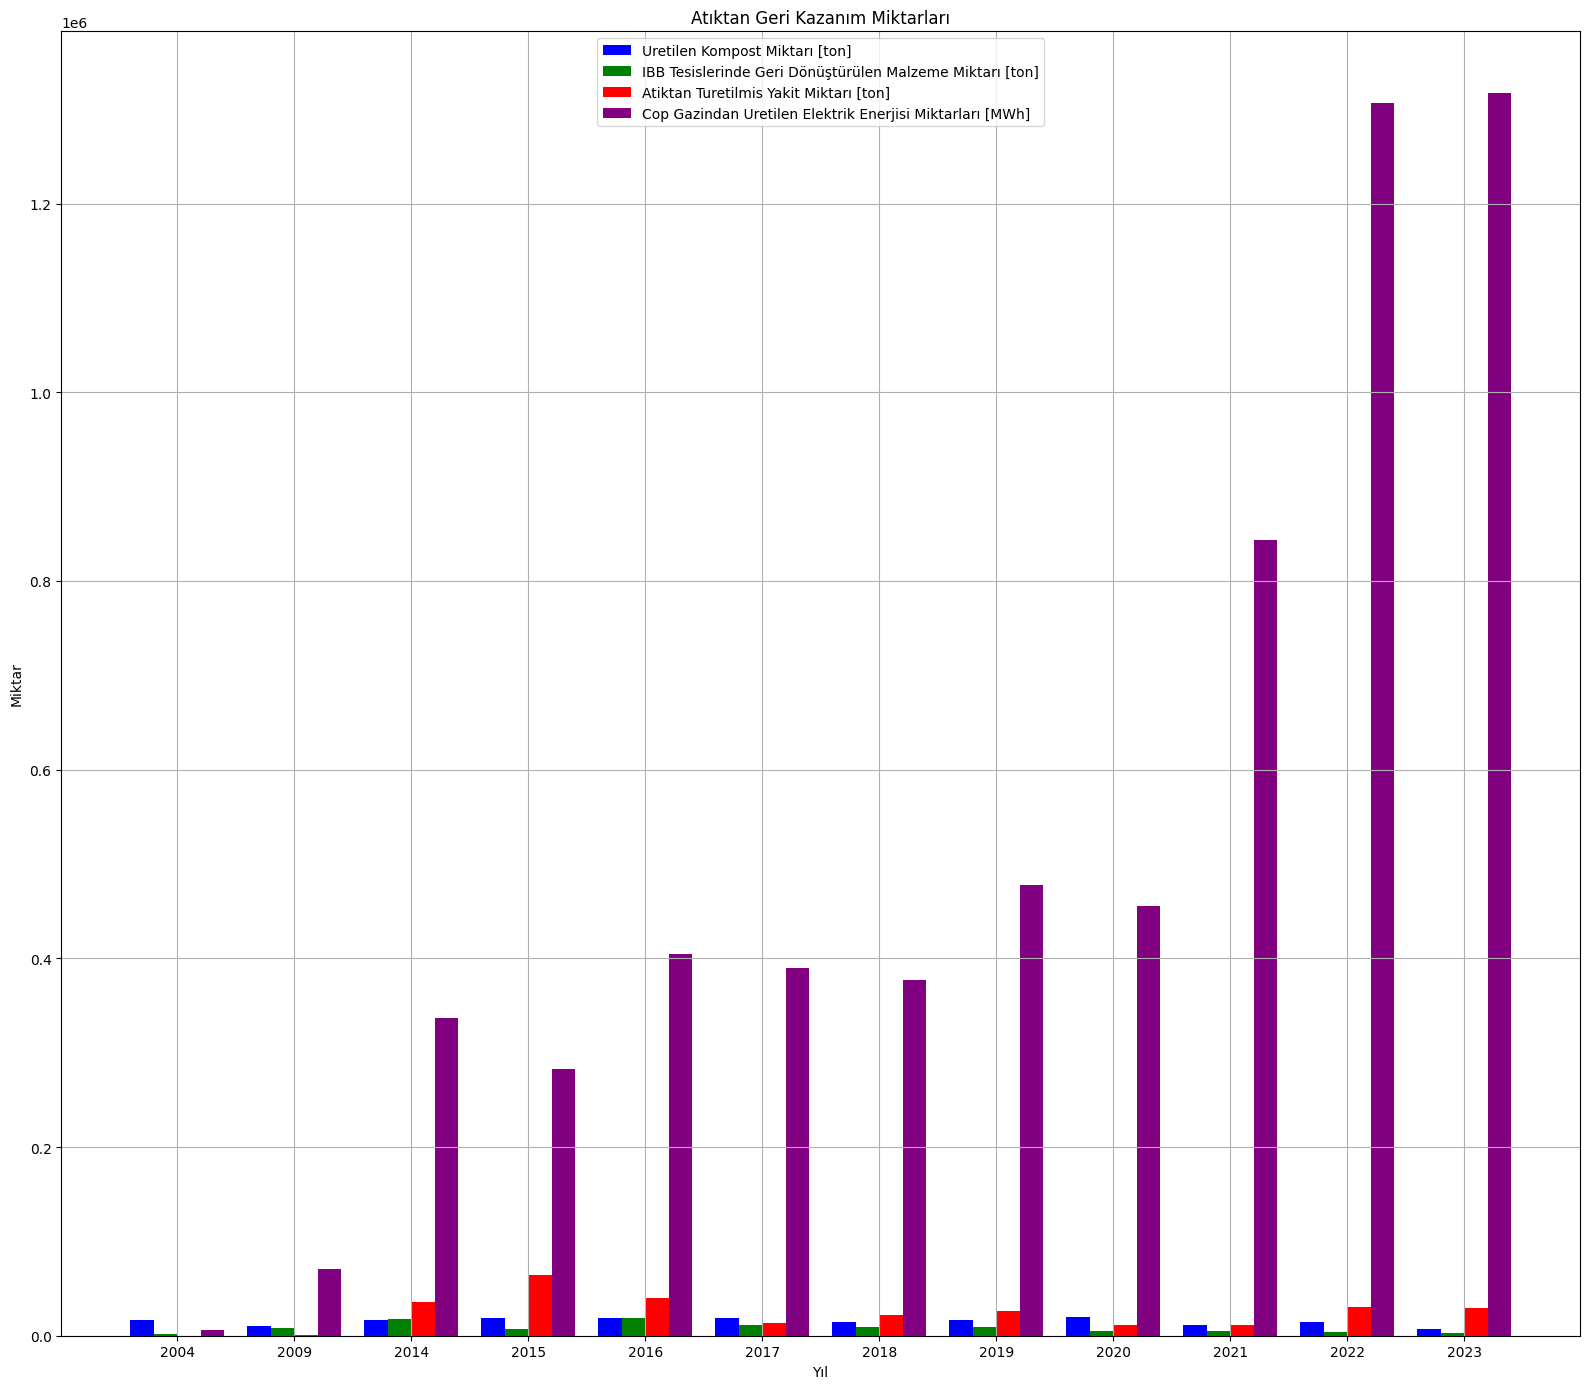

In [98]:
bar_width = 0.2
index = range(len(yil_bilgisi))

plt.figure(figsize=(16, 14))

# Kompost Miktarı Bar Plot
plt.bar(index, kompost_miktari, bar_width, label=csv_dosya.columns[1], color='blue')

# Geri Dönüştürülen Malzeme Miktarı Bar Plot
plt.bar([i + bar_width for i in index], geri_donusturulen_malzeme_miktari, bar_width, label=csv_dosya.columns[2], color='green')

# Atıktan Türetilmiş Yakıt Miktarı Bar Plot
plt.bar([i + 2 * bar_width for i in index], atik_yakiti_miktari, bar_width, label=csv_dosya.columns[3], color='red')

# Çöp Gazından Üretilen Elektrik Enerjisi Miktarı Bar Plot
plt.bar([i + 3 * bar_width for i in index], elektrik_enerjisi_miktari, bar_width, label=csv_dosya.columns[4], color='purple')

# X eksenini belirli yıllara ayarla
plt.xlabel('Yıl')
plt.ylabel('Miktar')
plt.title('Atıktan Geri Kazanım Miktarları')
plt.xticks([i + 1.5 * bar_width for i in index], yil_bilgisi)
plt.legend(["Uretilen Kompost Miktarı [ton]", "IBB Tesislerinde Geri Dönüştürülen Malzeme Miktarı [ton]", "Atiktan Turetilmis Yakit Miktarı [ton]", "Cop Gazindan Uretilen Elektrik Enerjisi Miktarları [MWh]"])
plt.grid(True)

plt.tight_layout()
plt.show()